In [4]:
from testing_algo import Shot_Detector
import sys

sys.path.append('../')
from utils import video_paths

In [5]:
videos = video_paths('T:\Shot-Neural-Network\data')

In [6]:
y_true = []
for vid in videos:
    if vid.split('\\')[-2] == 'make':
        y_true.append(1)
    else:
        y_true.append(0)

y_true

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [7]:
model = r'T:\Shot-Neural-Network\models\last_model_4.pt'

In [8]:
y_pred = []

for i in range(len(videos)):
    makes, _ = Shot_Detector(videos[i], model, f'results/{i}', display_object_info=True).run()
    y_pred.append(makes)


0: 384x640 1 ball, 1 hoop, 101.0ms
Speed: 15.6ms preprocess, 101.0ms inference, 1250.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 1 hoop, 87.4ms
Speed: 3.0ms preprocess, 87.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 balls, 1 hoop, 84.3ms
Speed: 0.0ms preprocess, 84.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 1 hoop, 64.1ms
Speed: 0.0ms preprocess, 64.1ms inference, 14.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 1 hoop, 62.5ms
Speed: 6.8ms preprocess, 62.5ms inference, 15.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 78.1ms
Speed: 0.0ms preprocess, 78.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 1 hoop, 78.1ms
Speed: 0.0ms preprocess, 78.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 1 hoop, 85.1ms
Speed: 0.0ms preprocess, 85.1ms inferenc

In [9]:
accuracy = 0
wrong_idx = []
for i in range(len(y_true)):
    if y_true[i] == y_pred[i]:
        accuracy += 1
    else:
        wrong_idx.append(i)

accuracy /= len(y_true)
accuracy *= 100
accuracy

80.59701492537313

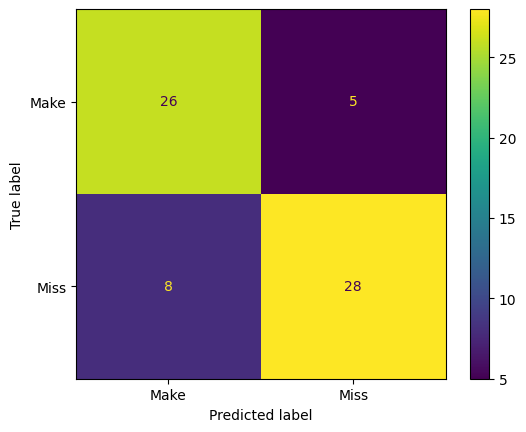

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Make', 'Miss']).plot()

In [11]:
wrong_idx

[1, 18, 23, 24, 27, 32, 33, 34, 44, 48, 49, 51, 53]

# Conclusion

Looking at the outputs of the missclassified videos, there are commmon themes:
- Ball did not fully go through the net, so the algorithm did not detect a full shot
- Moving camera, not allowing the algorithm to track the ball/hoop well
- Camera angle that makes it seem like the ball went in as the ball falls closer/further than the rim but is still in between the ends of the rim

The position of the camera is crucial for the algorithm to have accurate classifications. Based on these results, the camera should be still and placed in front of the rim, rather than the side, to minimize missclassifications by on target short/long shots by not allowing their to be long shots (because of the backboard).